In [3]:
# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os
import pandas as pd

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [4]:
import pandas as pd

carsdf=pd.read_csv("used_car_sales.csv")


In [5]:
carsdf.head()

,ID,pricesold,yearsold,zipcode,Mileage,Make,Model,Year,Trim,Engine,BodyType,NumCylinders,DriveType
0,137178,7500,2020,786**,84430,Ford,Mustang,1988,LX,5.0L Gas V8,Sedan,0,RWD
1,96705,15000,2019,81006,0,Replica/Kit Makes,Jaguar Beck Lister,1958,NaN,383 Fuel injected,Convertible,8,RWD
2,119660,8750,2020,33449,55000,Jaguar,XJS,1995,2+2 Cabriolet,4.0L In-Line 6 Cylinder,Convertible,6,RWD
3,80773,11600,2019,7852,97200,Ford,Mustang,1968,Stock,289 cu. in. V8,Coupe,8,RWD
4,64287,44000,2019,7728,40703,Porsche,911,2002,Turbo X-50,3.6L,Coupe,6,AWD


In [6]:
carsdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122144 entries, 0 to 122143
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   ID            122144 non-null  int64 
 1   pricesold     122144 non-null  int64 
 2   yearsold      122144 non-null  int64 
 3   zipcode       121235 non-null  object
 4   Mileage       122144 non-null  int64 
 5   Make          122144 non-null  object
 6   Model         121571 non-null  object
 7   Year          122144 non-null  int64 
 8   Trim          73220 non-null   object
 9   Engine        95046 non-null   object
 10  BodyType      101358 non-null  object
 11  NumCylinders  122144 non-null  int64 
 12  DriveType     97293 non-null   object
dtypes: int64(6), object(7)
memory usage: 12.1+ MB


In [7]:
carsdf.size

1587872

In [8]:
carsdf.describe()

,ID,pricesold,yearsold,Mileage,Year,NumCylinders
count,122144.000000,122144.000000,122144.000000,1.221440e+05,1.221440e+05,1.221440e+05
mean,85094.212397,10808.560715,2019.375467,1.404291e+06,3.959362e+03,1.758655e+04
std,47786.970812,13987.295760,0.503671,3.335593e+07,1.984514e+05,6.144603e+06
min,1.000000,0.000000,2018.000000,0.000000e+00,0.000000e+00,0.000000e+00
25%,44547.250000,2950.000000,2019.000000,4.479225e+04,1.977000e+03,4.000000e+00
50%,85555.500000,6500.000000,2019.000000,9.000000e+04,2.000000e+03,6.000000e+00
75%,127078.500000,13800.000000,2020.000000,1.402000e+05,2.008000e+03,8.000000e+00
max,165801.000000,404990.000000,2020.000000,1.235669e+09,2.014000e+07,2.147484e+09


In [9]:
# data preprocessing
cars_df = carsdf.drop(columns=['ID', 'yearsold', 'NumCylinders', 'Engine', 'Trim', 'zipcode', 'DriveType', 'BodyType'])
cars_df

,pricesold,Mileage,Make,Model,Year
0,7500,84430,Ford,Mustang,1988
1,15000,0,Replica/Kit Makes,Jaguar Beck Lister,1958
2,8750,55000,Jaguar,XJS,1995
3,11600,97200,Ford,Mustang,1968
4,44000,40703,Porsche,911,2002
...,...,...,...,...,...
122139,4200,102700,Ford,Mustang,1977
122140,6500,128000,Ford,E-Series Van,2012
122141,2000,50000,Ford,Bronco,1978
122142,2280,164337,BMW,3-Series,2000


In [10]:
cars_df.shape

(122144, 5)

In [11]:
cars_df = cars_df.dropna()
cars_df

,pricesold,Mileage,Make,Model,Year
0,7500,84430,Ford,Mustang,1988
1,15000,0,Replica/Kit Makes,Jaguar Beck Lister,1958
2,8750,55000,Jaguar,XJS,1995
3,11600,97200,Ford,Mustang,1968
4,44000,40703,Porsche,911,2002
...,...,...,...,...,...
122139,4200,102700,Ford,Mustang,1977
122140,6500,128000,Ford,E-Series Van,2012
122141,2000,50000,Ford,Bronco,1978
122142,2280,164337,BMW,3-Series,2000


In [12]:
cars_df.shape

(121571, 5)

In [13]:
# only keep cars with greater than 5000 miles and less than 500000 miles
cars_df = cars_df[cars_df['Mileage'] >= 5000]
cars_df = cars_df[cars_df['Mileage'] <= 500000]
cars_df

,pricesold,Mileage,Make,Model,Year
0,7500,84430,Ford,Mustang,1988
2,8750,55000,Jaguar,XJS,1995
3,11600,97200,Ford,Mustang,1968
4,44000,40703,Porsche,911,2002
5,950,71300,Mercury,Montclair,1965
...,...,...,...,...,...
122139,4200,102700,Ford,Mustang,1977
122140,6500,128000,Ford,E-Series Van,2012
122141,2000,50000,Ford,Bronco,1978
122142,2280,164337,BMW,3-Series,2000


In [14]:
cars_df = cars_df[cars_df['Year'] >= 1900]
cars_df = cars_df[cars_df['Year'] <= 2021]
cars_df = cars_df[cars_df['Model'] != 'Other']
cars_df = cars_df[cars_df['pricesold'] >= 100]
cars_df.to_csv('cars_preprocessed.csv')

In [15]:
cars_df = pd.read_csv('cars_preprocessed.csv')
cars_df

,Unnamed: 0,pricesold,Mileage,Make,Model,Year
0,0,7500,84430,Ford,Mustang,1988
1,2,8750,55000,Jaguar,XJS,1995
2,3,11600,97200,Ford,Mustang,1968
3,4,44000,40703,Porsche,911,2002
4,5,950,71300,Mercury,Montclair,1965
...,...,...,...,...,...,...
109020,122139,4200,102700,Ford,Mustang,1977
109021,122140,6500,128000,Ford,E-Series Van,2012
109022,122141,2000,50000,Ford,Bronco,1978
109023,122142,2280,164337,BMW,3-Series,2000


In [16]:
cars_df["Mileage"].value_counts()

100000    1437
99999      964
150000     345
80000      329
65000      309
          ... 
183438       1
50319        1
144529       1
9363         1
133119       1
Name: Mileage, Length: 57946, dtype: int64

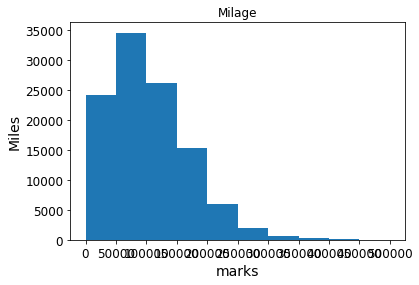

In [17]:
from matplotlib import pyplot as plt
import numpy as np
fig,ax = plt.subplots(1,1)
a = cars_df["Mileage"]
ax.hist(a, bins = [0,50000,100000,150000,200000,250000,300000,350000,400000,450000,500000])
ax.set_title("Milage")
ax.set_xticks([0,50000,100000,150000,200000,250000,300000,350000,400000,450000,500000])
ax.set_xlabel('marks')
ax.set_ylabel('Miles')
plt.show()

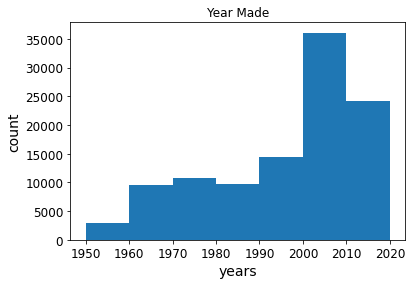

In [18]:
from matplotlib import pyplot as plt
import numpy as np
fig,ax = plt.subplots(1,1)
a = cars_df["Year"]
ax.hist(a, bins = [1950,1960,1970,1980,1990,2000,2010,2020])
ax.set_title("Year Made")
ax.set_xticks([1950,1960,1970,1980,1990,2000,2010,2020])
ax.set_xlabel('years')
ax.set_ylabel('count')
plt.show()

<AxesSubplot:>

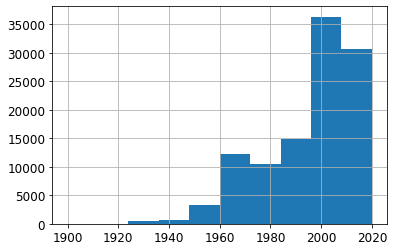

In [19]:
cars_df['Year'].hist()

In [28]:
def split_train_test(data, ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data)*ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [35]:
# split the data into training and testing set with a 20% ratio
train_set, test_set = split_train_test(cars_df, 0.2)

In [36]:
train_set

,Unnamed: 0,pricesold,Mileage,Make,Model,Year
39874,44861,24250,28900,Jeep,Wrangler,2016
7837,8963,1800,361700,Chevrolet,Caprice,1990
24491,27518,200,150000,Chevrolet,Malibu,2001
47047,53002,5100,165455,Ford,Bronco,1966
39780,44759,1180,174990,BMW,7-Series,2000
...,...,...,...,...,...,...
24361,27375,3000,232386,Mercedes-Benz,GL-Class,2009
86412,96787,190,270000,Volkswagen,Jetta,1981
101441,113556,41600,109689,Mercedes-Benz,200-Series,1971
55170,61837,1560,327963,Toyota,Camry,2005


In [37]:
test_set

,Unnamed: 0,pricesold,Mileage,Make,Model,Year
9448,10768,1830,142542,Subaru,Forester,2001
57942,64727,4050,265033,Acura,Integra,2000
47558,53603,7450,73002,Lincoln,Blackwood,2002
107717,120655,9500,26400,Toyota,Prius,2016
10703,12150,10700,19750,Chevrolet,Equinox,2017
...,...,...,...,...,...,...
10675,12118,29080,16600,GMC,Yukon,2017
95314,106676,40000,6718,Ford,Mustang,1968
32959,37011,10000,104789,Chevrolet,Blazer,1972
64435,72143,12500,59115,Chevrolet,C-10,1971


In [ ]:
from sklearn import linear_model
